# Simple Linear Regression

In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('height-weight.csv')
df.head()

,Weight,Height
0,45,120
1,58,135
2,48,123
3,60,145
4,70,160


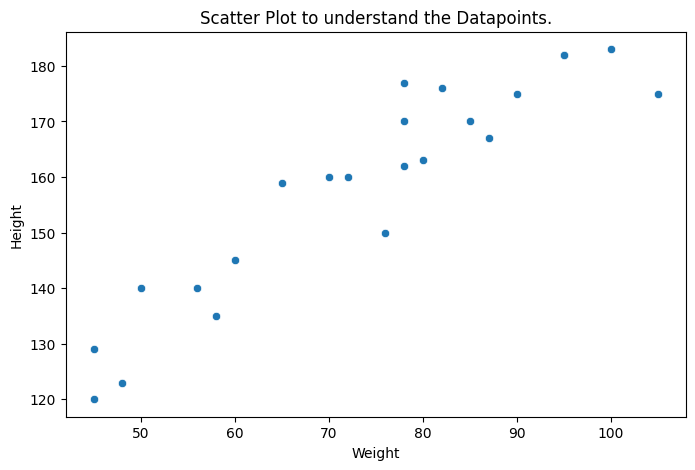

In [3]:
plt.figure(figsize=(8,5))
sns.scatterplot(data=df,x='Weight',y='Height')
plt.title("Scatter Plot to understand the Datapoints.")
plt.show()

In [4]:
linearrg = LinearRegression()
# divide dataset based on dependent and independent feature
X = df[['Weight']] #independent feature
y = df['Height'] # dependent feature
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)


In [5]:
# Standarizing the Train data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train) # fit calculates mean and std, transform will apply z-score values.
X_test = scaler.transform(X_test)

In [6]:
linearrg.fit(X_train, y_train)
y_pred = linearrg.predict(X_test)

In [7]:
print(f"Slope or coefficient of weight is {linearrg.coef_}")
print(f"Intercept is {linearrg.intercept_}")

Slope or coefficient of weight is [17.03440872]
Intercept is 157.5


In [8]:
y_pred  

array([161.08467086, 161.08467086, 129.3041561 , 177.45645118,
       148.56507414])

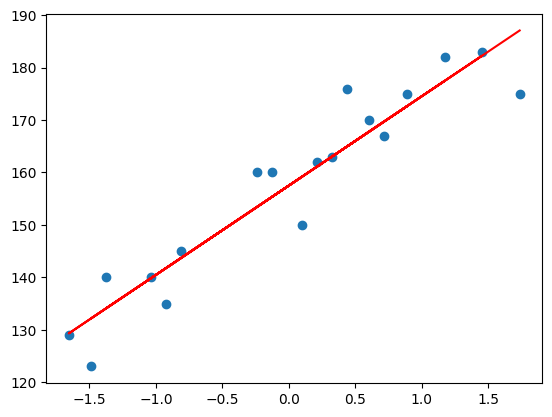

In [9]:
plt.scatter(X_train,y_train)
plt.plot(X_train, linearrg.predict(X_train),color='red')

In [10]:
mae = mean_absolute_error(y_test,y_pred)
mse = mean_squared_error(y_test,y_pred)
print(f"MAE : {mae}, MSE: {mse}")

MAE : 9.822657814519232, MSE: 109.77592599051664


In [11]:
from sklearn.metrics import r2_score
r2score = r2_score(y_test,y_pred)
print(f"r^2: {r2score}")

r^2: 0.776986986042344


In [12]:
scaled_weight = scaler.transform([[80]])
scaled_weight

/Users/aadityakhanal/Library/Caches/pypoetry/virtualenvs/nas-classifier-rF1tT1vl-py3.12/lib/python3.12/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([[0.32350772]])

In [16]:
new_pred = linearrg.predict([scaled_weight[0]])

In [17]:
print(f"Height predicted for 80kg weight is {new_pred}")

Height predicted for 80kg weight is [163.01076266]
